## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [1]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from seed_to_voxels import Seed2voxels

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()
/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [2]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    #config['list_subjects']=config["list_subjects_younger"]
signal='raw'
seed_indiv=False

### <font color=#4424D6> II. Initialize class based on this </font>

In [3]:
seed2voxels=Seed2voxels(config,seed_indiv) # initialize the function

Start the analysis on: 31 participants
targeted voxel's group mask: MNI_GM_3mm
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/mask/brain/MNI_GM_3mm.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/mask/spinalcord/full/gmwm/C1C7_DL_gmwm.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/mask/spinalcord/full/gmwm/C1C7_VL_gmwm.nii.gz


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Data extraction </font></span>
### <font color=#4424D6> I. Time series extraction - Target </font>


In [8]:
target_timeseries,seeds_timeseries =seed2voxels.extract_data(redo=True,n_jobs=8) 


data extracted:   0%|          | 0/2 [00:00<?, ?it/s]

C1C7_DL_gmwm


data extracted:   0%|          | 0/2 [05:23<?, ?it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/joblib/parallel.py", line 921, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/joblib/_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "/usr/lib/python3.6/concurrent/futures/_base.py", line 427, in result
    self._condition.wait(timeout)
  File "/usr/lib/python3.6/threading.py", line 295, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global

TypeError: object of type 'NoneType' has no len()

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 567, in run
    self.flag_executor_shutting_down()
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 756, in flag_executor_shutting_down
    self.kill_workers()
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 766, in kill_workers
    recursive_terminate(p)
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursive_termin

## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Correlation analysis

In [ ]:
output_dir={};output_file={}; 
for seed_name in config["seeds"]["seed_names"]:
    output_dir[seed_name]=config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/' + seed_name + '/' + config["targeted_voxels"]["target_name"]+ '_fc_maps/Corr/'
    if not os.path.exists(output_dir[seed_name]):
        os.mkdir(output_dir[seed_name])
    
    output_file[seed_name]=  output_dir[seed_name] +'/corr_' + str(len(config['list_subjects'])) + 'subjects_seed_' + seed_name + '_s'
    
    # run correlation analysis
    corr=seed2voxels.correlation_maps(seeds_timeseries["zmean"][seed_name],
                                      target_timeseries["zscored"],
                                      output_img=output_file[seed_name],
                                      Fisher=True,
                                      partial=False,
                                      save_maps=True,
                                      smoothing_output=None,
                                      redo=True,
                                      n_jobs=8)

    #calculate the mean across participant
    string="fslmaths " +output_file[seed_name] + " -Tmean " + output_file[seed_name].split(".")[0] + "_mean.nii.gz"
    os.system(string)
   

## <font color=#B2D732> <span style="background-color: #4424D6"> D/ Mutual information

In [ ]:
output_dir={};output_file={};
for seed_name in config["seeds"]["seed_names"]:
    output_dir[seed_name]=config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/' + seed_name + '/' + config["targeted_voxels"]["target_name"]+ '_fc_maps/MI/'
   
    if not os.path.exists(output_dir[seed_name]):
            os.mkdir(output_dir[seed_name])
    
    output_file[seed_name]=  output_dir[seed_name] +'/mi_' + str(len(config['list_subjects'])) + 'subjects_seed_' + seed_name + '_ss'
  
    
    mi=seed2voxels.mutual_info_maps(seeds_timeseries["zmean"][seed_name],
                                    target_timeseries["zscored"],
                                    output_img=output_file[seed_name],
                                    save_maps=True,
                                    z_scored=False,
                                    smoothing_output=[6,6,6],redo=True, n_jobs=8)
    
    #calculate the mean across participant
    string="fslmaths " +output_file[seed_name] + " -Tmean " + output_file[seed_name].split(".")[0] + "_mean.nii.gz"
    os.system(string)

In [108]:

bin_size = 0.001
bins = np.arange(min(mi[0]), max(mi[0]) + bin_size, bin_size)
hist, bin_edges = np.histogram(mi[1], bins=bins)# Create the histogram
max_count_bins = np.where(hist == np.max(hist))[0] # Find the bin(s) with the highest count
#mode_values = 
bin_edges[max_count_bins] # Find the mode value(s) within the bin(s)
#seed_to_voxel_mi=seed_to_voxel_mi -  mode_values

array([0.])

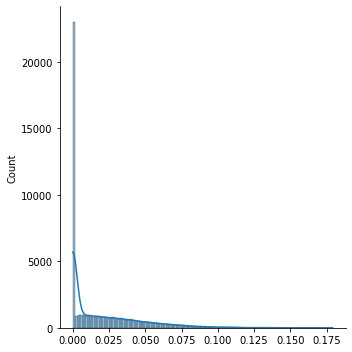

In [109]:
import seaborn as sns
sns.displot(x=mi[0], kde=True)
#plt.axvline(x = mode_values,color= "yellow")
#plt.axvline(x = np.median(data),color= "red")
#plt.axvline(x = np.percentile(data,q=95),color= "red")
#plt.axvline(x = np.percentile(data,q=5),color= "red")

In [24]:
## estimate the mode value
bin_size = 0.001
bins = np.arange(min(seed_to_voxel_mi[0]), max(seed_to_voxel_mi[0]) + bin_size, bin_size)
hist, bin_edges = np.histogram(seed_to_voxel_mi[0], bins=bins)# Create the histogram
max_count_bins = np.where(hist == np.max(hist))[0] # Find the bin(s) with the highest count
mode_values = bin_edges[0] # Find the mode value(s) within the bin(s)

#seed_to_voxel_mi /= np.nanmax(seed_to_voxel_mi, where=~np.isnan(seed_to_voxel_mi)) 
seed_to_voxel_mi[0]=seed_to_voxel_mi[0]-mode_values # remove the mode of the distribution
     

## <font color=#B2D732> <span style="background-color: #4424D6"> D/ Distance correlation

In [25]:
output_dir={};output_file={};
for seed_name in config["seeds"]["seed_names"]:
    
    
    output_dir[seed_name]=config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/' + seed_name + '/' + config["targeted_voxels"]["target_name"]+ '_fc_maps/dCorr/'
   
    if not os.path.exists(output_dir[seed_name]):
            os.mkdir(output_dir[seed_name])
    
    output_file[seed_name]=  output_dir[seed_name] +'/dCorr_' + str(len(config['list_subjects'])) + 'subjects_seed_' + seed_name.split('_')[-1] + '_s_z'
  
    dist_corr=seed2voxels.distance_corr_maps(seeds_timeseries["zscored"][seed_name],
                                    target_timeseries["zscored"],
                                    output_img= output_file[seed_name],
                                    save_maps=True,
                                    smoothing_output=[6,6,6],redo=True, n_jobs=1)
    
     #calculate the mean across participant
    string="fslmaths " +output_file[seed_name] + " -Tmean " + output_file[seed_name].split(".")[0] + "_mean.nii.gz"
    os.system(string)

process duration:  22%|██▏       | 11356/50572 [04:39<16:04, 40.64it/s]


KeyboardInterrupt: 

In [19]:
if os.path.exists("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels/spring_2023//1_first_level/spinalcord_C1C8-RD/brain_fc_maps/mMI_28subjects_seed_C1C8-RD_s.nii"):
    print("yes")

yes


#### <font color=#4424D6> Two sample t-test

In [22]:
import shutil
#1. select the analyses to compared
#'spinalcord_GM-C4C5L','spinalcord_GM-C4C5R',
#'spinalcord_GM-C6C8L','spinalcord_GM-C6C8R'
        
seed1='spinalcord_GM-C6C8R'
seed2='spinalcord_GM-C6C8L'
output_dir=config['main_dir'] + config['seed2vox_dir'] + '/2_second_level/'+seed1+'-'+seed2.split('-')[-1]
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
#2. merge the images from the 2 contrasts in one 4D image
    run_proc('fslmerge -t {} {} {}'.format(output_dir + '/'+seed1+'-'+seed2.split('-')[-1]+'_images.nii', 
                                    config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/' +seed1 + '/' + target_name[0].split('_')[0]+ '_fc_maps/21subjects_seed_'+seed1.split('_')[-1]+'_s_zcorr',
                                    config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/' +seed2 + '/' + target_name[0].split('_')[0]+ '_fc_maps/21subjects_seed_'+seed2.split('_')[-1]+'_s_zcorr'))

#3. Run randomize
    run_proc('randomise -i {} -o {} -d {} -t {} -e {} -m {} -v 5 -n 500  -T'.format(output_dir + '/'+seed1+'-'+seed2.split('-')[-1]+'_images.nii',
                                                                                    output_dir + '/'+seed1+'-'+seed2.split('-')[-1],
                                                                                    config['main_dir'] + config['seed2vox_dir'] + '/2_second_level/fsl_designs/2paired-t-test/design_group.mat',
                                                                                    config['main_dir'] + config['seed2vox_dir'] + '/2_second_level/fsl_designs/2paired-t-test/design_group.con',
                                                                                    config['main_dir'] + config['seed2vox_dir'] + '/2_second_level/fsl_designs/2paired-t-test/design_group.grp',
                                                                                mask_target))

fslmerge -t /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels//2_second_level/spinalcord_GM-C6C8R-C6C8L/spinalcord_GM-C6C8R-C6C8L_images.nii /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels//1_first_level/spinalcord_GM-C6C8R/brain_fc_maps/21subjects_seed_GM-C6C8R_s_zcorr /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels//1_first_level/spinalcord_GM-C6C8L/brain_fc_maps/21subjects_seed_GM-C6C8L_s_zcorr # in /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/notebook


RuntimeError: Image Exception : #63 :: No image files match: /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels//1_first_level/spinalcord_GM-C6C8R/brain_fc_maps/21subjects_seed_GM-C6C8R_s_zcorr
terminate called after throwing an instance of 'std::runtime_error'
what():  No image files match: /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels//1_first_level/spinalcord_GM-C6C8R/brain_fc_maps/21subjects_seed_GM-C6C8R_s_zcorr

In [98]:
input='/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/masks/spinalcord_C1C8-L.nii.gz'
mask='/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/masks/spinalcord_GM-cord.nii.gz'
output='/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/masks/spinalcord_GM-L.nii.gz'
run_proc('fslmaths {} -mas {} {}'.format(input,mask,output))

fslmaths /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/masks/spinalcord_C1C8-L.nii.gz -mas /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/masks/spinalcord_GM-cord.nii.gz /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/masks/spinalcord_GM-L.nii.gz # in /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/notebook


(0, '')